<a href="https://colab.research.google.com/github/RewGuardiano/AI_Module_Assignment/blob/main/Soduku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def generate_indiviual():
  sudoku = np.zeros((9,9), dtype=int)  # Initialize empty grid
  for i in range(9):
    numbers = list(range(1,10))
    random.shuffle(numbers)
    sudoku[i]= numbers
  return sudoku

In [ ]:
sudoku_grid = generate_indiviual()
print(sudoku_grid)

[[9 3 2 1 8 4 5 6 7]
 [6 1 7 8 2 9 5 3 4]
 [8 9 4 5 6 1 2 7 3]
 [7 6 3 1 4 8 5 9 2]
 [3 5 8 1 2 9 7 4 6]
 [4 8 1 7 2 3 6 5 9]
 [5 9 2 3 6 8 1 4 7]
 [7 9 6 1 8 5 2 3 4]
 [4 5 2 7 3 9 1 6 8]]


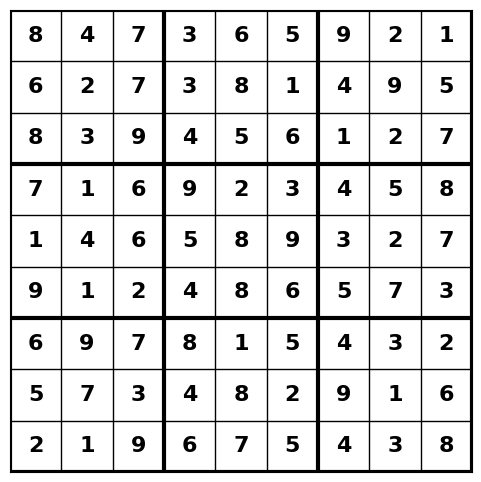

In [ ]:
# Visualize the Sudoku grid with proper alignment
def visualize_sudoku(sudoku):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Ensure equal aspect ratio so that cells are square
    ax.set_aspect("equal")

    # Draw minor grid lines (thin cell borders)
    for i in range(10):
        lw = 1 if i % 3 != 0 else 3  # Thicker lines for 3x3 sub-grid
        ax.plot([i, i], [0, 9], color="black", linewidth=lw)  # Vertical lines
        ax.plot([0, 9], [i, i], color="black", linewidth=lw)  # Horizontal lines

    # Hide axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Fill in the numbers
    for i in range(9):
        for j in range(9):
            num = sudoku[i, j]
            if num != 0:
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center',
                        fontsize=16, fontweight='bold')

    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.show()

# Example usage
sudoku_grid = generate_indiviual()  # Generate Sudoku
visualize_sudoku(sudoku_grid)  # Display Sudoku


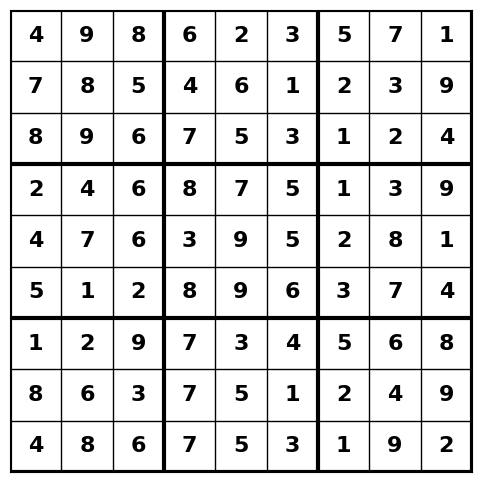

Total cost: 53
Column duplicate indices: [(4, 0), (7, 0), (8, 0), (2, 1), (8, 1), (3, 2), (4, 2), (8, 2), (5, 3), (6, 3), (7, 3), (8, 3), (5, 4), (7, 4), (8, 4), (2, 5), (4, 5), (7, 5), (8, 5), (3, 6), (4, 6), (6, 6), (7, 6), (8, 6), (3, 7), (5, 7), (3, 8), (4, 8), (5, 8), (7, 8)]
Subgrid duplicate indices: [(1, 1), (2, 0), (2, 1), (1, 4), (2, 5), (2, 6), (2, 7), (4, 0), (4, 2), (5, 2), (4, 5), (5, 3), (5, 4), (4, 8), (5, 6), (8, 1), (8, 2), (7, 3), (8, 3), (8, 4), (8, 5), (8, 7), (8, 8)]


In [ ]:
def visualize_sudoku(sudoku):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect("equal")

    # Draw minor grid lines (thin cell borders)
    for i in range(10):
        lw = 1 if i % 3 != 0 else 3  # Thicker lines for 3x3 sub-grid
        ax.plot([i, i], [0, 9], color="black", linewidth=lw)  # Draws Vertical lines
        ax.plot([0, 9], [i, i], color="black", linewidth=lw)  # Draws Horizontal lines

    # Hide axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Fill in the numbers
    for i in range(9):
        for j in range(9):
            num = sudoku[i, j]
            if num != 0:
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center',
                        fontsize=16, fontweight='bold')

    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.show()

def check_cost(sudoku):
  #lists
    column_duplicates = []
    subgrid_duplicates = []

    # Check columns
    column_cost = 0
    for col in range(9):
      #dictionary to keep track of numbers already encountered
        seen = {}
        for row in range(9):
            num = sudoku[row, col]
            if num in seen:
                column_duplicates.append((row, col))
                column_cost += 1
            else:
                seen[num] = (row, col) #else stores its indices coordinates if not a duplicate

    # Check 3x3 subgrids
    subgrid_cost = 0
    for box_row in range(3):
        for box_col in range(3):
            seen = {}
            #inner for loops iterate through the cells inside the subgrids
            for i in range(3):
                for j in range(3):
                    row = box_row * 3 + i
                    col = box_col * 3 + j
                    num = sudoku[row, col]
                    if num in seen:
                        subgrid_duplicates.append((row, col))
                        subgrid_cost += 1
                    else:
                        seen[num] = (row, col)

    total_cost = column_cost + subgrid_cost
    return total_cost, column_duplicates, subgrid_duplicates

# Generate a random Sudoku grid
sudoku_grid = generate_indiviual()

# Visualize the Sudoku grid
visualize_sudoku(sudoku_grid)

#calculating cost
cost, column_duplicates, subgrid_duplicates = check_cost(sudoku_grid)
# Print results
print("Total cost:", cost)
if cost == 0:
    print("The Sudoku grid is perfect!")
else:
    print("Column duplicate indices:", column_duplicates)
    print("Subgrid duplicate indices:", subgrid_duplicates)

In [ ]:
def crossover_function(parent1,parent2):

# Create copies to avoid modifying the parents
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()

    # Select a subset of rows to crossover
    num_rows = random.randint(2, 4)
    crossover_rows = random.sample(range(9), num_rows)

    for row in crossover_rows:
        # Generate two crossover points
        cx_point1, cx_point2 = sorted(random.sample(range(9), 2))

        # Create mapping between parents for this segment
        mapping = {}
        for i in range(cx_point1, cx_point2 + 1):
            mapping[parent1[row, i]] = parent2[row, i]
            mapping[parent2[row, i]] = parent1[row, i]

        # Apply segment from second parent to first offspring
        offspring1[row, cx_point1:cx_point2+1] = parent2[row, cx_point1:cx_point2+1]

        # Apply segment from first parent to second offspring
        offspring2[row, cx_point1:cx_point2+1] = parent1[row, cx_point1:cx_point2+1]

        # Fix the remaining elements in the row to ensure 1-9 appear exactly once
        for i in range(9):
            if i < cx_point1 or i > cx_point2:
                # Fix offspring1
                while offspring1[row, i] in offspring1[row, cx_point1:cx_point2+1]:
                    offspring1[row, i] = mapping.get(offspring1[row, i], offspring1[row, i])

                # Fix offspring2
                while offspring2[row, i] in offspring2[row, cx_point1:cx_point2+1]:
                    offspring2[row, i] = mapping.get(offspring2[row, i], offspring2[row, i])

    # Randomly select one of the two offspring to return
    return offspring1 if random.random() < 0.5 else offspring2

Parent 1:


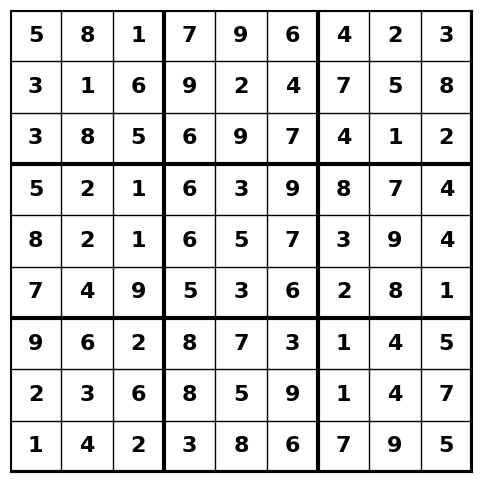

Parent 2:


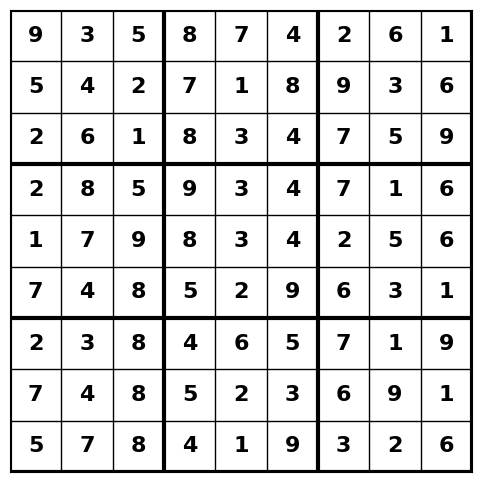

Offspring 1:


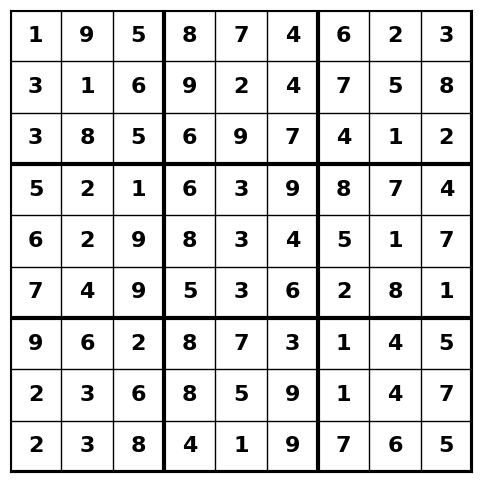

Offspring 2:


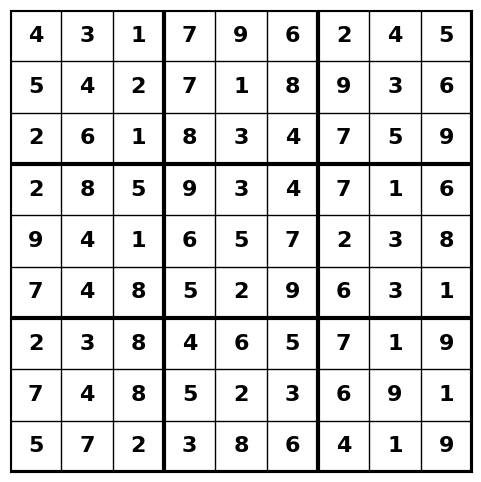

Offspring 1 Cost: 49
Offspring 2 Cost: 55


In [ ]:
def test_crossover():
    parent1 = generate_indiviual()
    parent2 = generate_indiviual()

    # Set specific crossover rows and points
    crossover_rows = [0, 4, 8]
    cx_point1, cx_point2 = 2, 5  # Crossover points in the middle

    # Create copies
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()

    # Perform crossover on specific rows
    for row in crossover_rows:
        # Create mapping
        mapping = {}
        for i in range(cx_point1, cx_point2 + 1):
            mapping[parent1[row, i]] = parent2[row, i]
            mapping[parent2[row, i]] = parent1[row, i]

        # Apply segment from second parent to first offspring
        offspring1[row, cx_point1:cx_point2+1] = parent2[row, cx_point1:cx_point2+1]

        # Apply segment from first parent to second offspring
        offspring2[row, cx_point1:cx_point2+1] = parent1[row, cx_point1:cx_point2+1]

        # Fix the remaining elements
        for i in range(9):
            if i < cx_point1 or i > cx_point2:
                # Fix for offspring1
                current_value = offspring1[row, i]
                # Get all values in the crossover section
                crossover_values = set(offspring1[row, cx_point1:cx_point2+1])

                attempts = 0
                max_attempts = 100  # Arbitrary limit to prevent infinite loops

                while current_value in crossover_values and attempts < max_attempts:
                    current_value = mapping.get(current_value, current_value)
                    attempts += 1

                    # If we're stuck in a loop, pick a random valid value
                    if attempts >= max_attempts:
                        # Find values not in this row
                        used_values = set(offspring1[row, :])
                        available_values = set(range(1, 10)) - used_values

                        # If there are available values, pick one
                        if available_values:
                            current_value = min(available_values)  # Just pick the smallest for determinism
                        # If no valid values (shouldn't happen in a valid Sudoku), keep original

                offspring1[row, i] = current_value

                # Fix for offspring2 (similar logic)
                current_value = offspring2[row, i]
                crossover_values = set(offspring2[row, cx_point1:cx_point2+1])

                attempts = 0
                while current_value in crossover_values and attempts < max_attempts:
                    current_value = mapping.get(current_value, current_value)
                    attempts += 1

                    if attempts >= max_attempts:
                        used_values = set(offspring2[row, :])
                        available_values = set(range(1, 10)) - used_values

                        if available_values:
                            current_value = min(available_values)

                offspring2[row, i] = current_value

    # Visualize and check results
    print("Parent 1:")
    visualize_sudoku(parent1)

    print("Parent 2:")
    visualize_sudoku(parent2)

    print("Offspring 1:")
    visualize_sudoku(offspring1)

    print("Offspring 2:")
    visualize_sudoku(offspring2)

    # Check costs
    cost_o1, _, _ = check_cost(offspring1)
    cost_o2, _, _ = check_cost(offspring2)
    print(f"Offspring 1 Cost: {cost_o1}")
    print(f"Offspring 2 Cost: {cost_o2}")

# Run the specific test
test_crossover()